# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date=city_weather['dt']
        #city_date = time.strftime("%Y-%m-%d",time.localtime(city_weather['dt']))

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | remedios
{'coord': {'lon': -79.5458, 'lat': 22.4947}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.51, 'feels_like': 22.96, 'temp_min': 22.51, 'temp_max': 22.51, 'pressure': 1013, 'humidity': 82, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.45, 'deg': 146, 'gust': 5.28}, 'clouds': {'all': 69}, 'dt': 1682679952, 'sys': {'type': 1, 'id': 7252, 'country': 'CU', 'sunrise': 1682678875, 'sunset': 1682725393}, 'timezone': -14400, 'id': 3542455, 'name': 'Remedios', 'cod': 200}
Processing Record 2 of Set 1 | raghunathpur
{'coord': {'lon': 86.6667, 'lat': 23.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.19, 'feels_like': 34.74, 'temp_min': 36.19, 'temp_max': 36.19, 'pressure': 1004, 'humidity': 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,remedios,22.4947,-79.5458,22.51,82,69,3.45,CU,1682679952
1,raghunathpur,23.5500,86.6667,36.19,22,91,5.10,IN,1682679952
2,puerto baquerizo moreno,-0.9000,-89.6000,25.88,82,68,4.13,EC,1682679954
3,port-aux-francais,-49.3500,70.2167,6.17,70,20,10.15,TF,1682679954
4,qaqortoq,60.7167,-46.0333,0.61,61,6,3.87,GL,1682679955


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remedios,22.4947,-79.5458,22.51,82,69,3.45,CU,1682679952
1,raghunathpur,23.5500,86.6667,36.19,22,91,5.10,IN,1682679952
2,puerto baquerizo moreno,-0.9000,-89.6000,25.88,82,68,4.13,EC,1682679954
3,port-aux-francais,-49.3500,70.2167,6.17,70,20,10.15,TF,1682679954
4,qaqortoq,60.7167,-46.0333,0.61,61,6,3.87,GL,1682679955


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

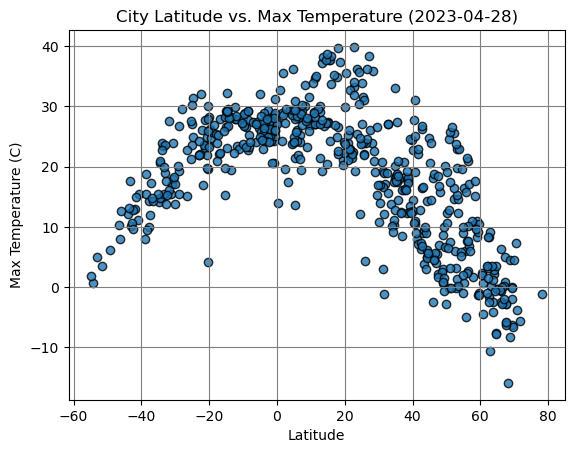

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature " + "("+str(time.strftime("%Y-%m-%d"))+")")
plt.grid(True, color='gray')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

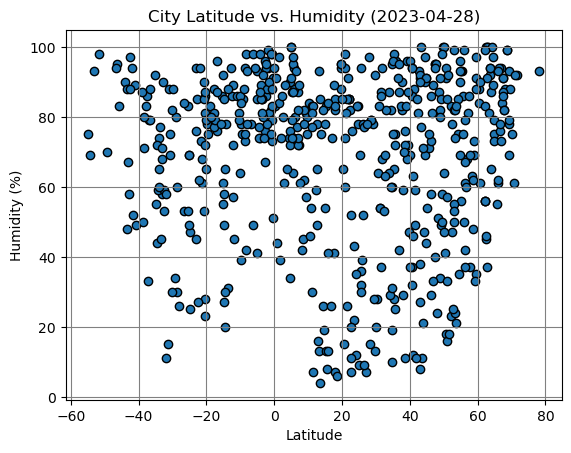

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity " + "("+str(time.strftime("%Y-%m-%d"))+")")
plt.grid(True, color='gray')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

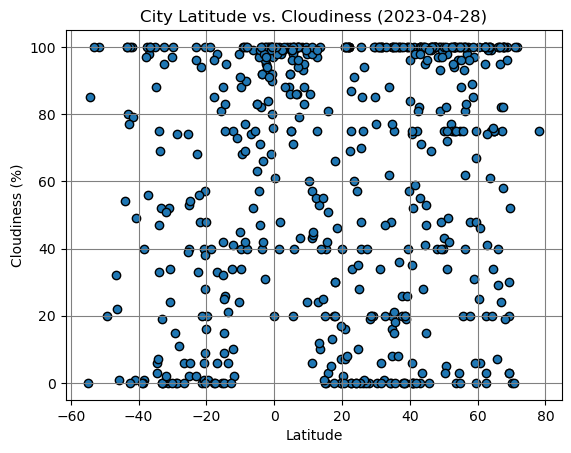

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness " + "("+str(time.strftime("%Y-%m-%d"))+")")
plt.grid(True, color='gray')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

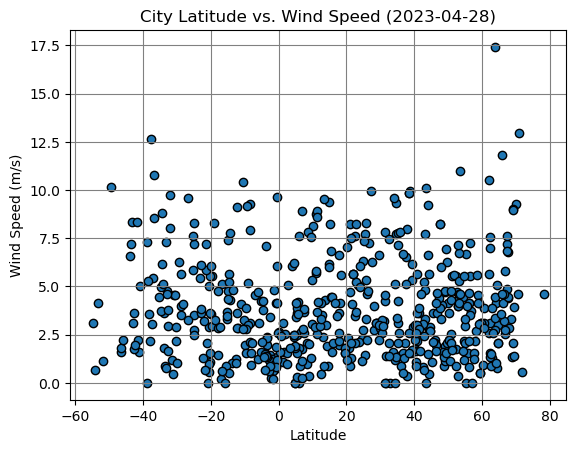

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed "+"(" + str(time.strftime("%Y-%m-%d"))+")")
plt.grid(True, color='gray')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remedios,22.4947,-79.5458,22.51,82,69,3.45,CU,1682679952
1,raghunathpur,23.5500,86.6667,36.19,22,91,5.10,IN,1682679952
4,qaqortoq,60.7167,-46.0333,0.61,61,6,3.87,GL,1682679955
5,noshiro,40.2039,140.0242,14.46,69,84,1.77,JP,1682679955
6,thompson,55.7435,-97.8558,-4.91,86,20,1.54,CA,1682679728


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto baquerizo moreno,-0.9000,-89.6000,25.88,82,68,4.13,EC,1682679954
3,port-aux-francais,-49.3500,70.2167,6.17,70,20,10.15,TF,1682679954
8,port mathurin,-19.6833,63.4167,26.24,78,20,5.56,MU,1682679957
10,port shepstone,-30.7414,30.4550,23.99,69,24,4.57,ZA,1682679958
12,howard springs,-12.4970,131.0470,27.95,86,34,1.22,AU,1682679959


###  Temperature vs. Latitude Linear Regression Plot

The regression values in Northern Hemisphere are :
 City_ID
0      22.906104
1      22.401221
4       4.619692
5      14.433556
6       6.999002
         ...    
557     7.570004
558    27.639990
559    24.030550
560     9.164742
563    13.127739
Name: Lat, Length: 380, dtype: float64
The r-value is: 0.6473902007324475


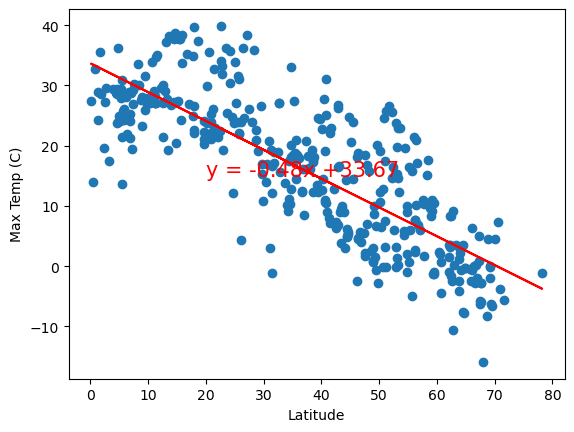

In [28]:
# Define a function to create Linear Regression plots


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Get regression values
regress_values_n = northern_hemi_df['Lat'] * slope + intercept
print(f'The regression values in Northern Hemisphere are :\n {regress_values_n}')

# Linear regression on Northern Hemisphere
line_eq_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Create Plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],marker="o")
plt.plot(northern_hemi_df['Lat'],regress_values_n,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_eq_n,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The regression values in Southern Hemisphere are :
 City_ID
2      29.089017
3      11.634061
8      22.322006
10     18.338133
12     24.910995
         ...    
543    22.056993
544    27.941565
548    18.518555
561    27.872718
562    26.342230
Name: Lat, Length: 184, dtype: float64
y = 0.36x +29.41
The r-value is: 0.5998109042092583


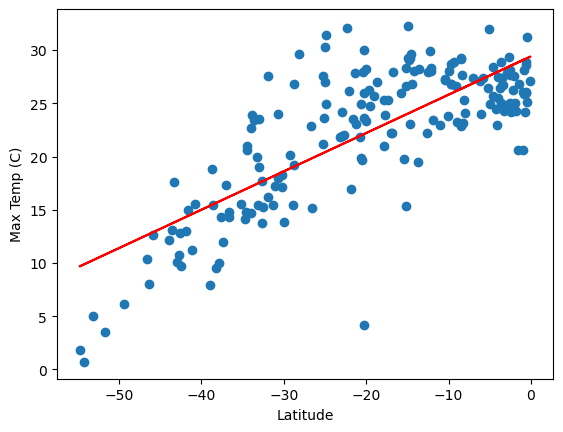

In [29]:
# Linear regression on Southern Hemisphere
# Define a function to create Linear Regression plots


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Get regression values
regress_values_s = southern_hemi_df['Lat'] * slope + intercept
print(f'The regression values in Southern Hemisphere are :\n {regress_values_s}')

# Linear regression on Northern Hemisphere
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_s)

# Create Plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],marker="o")
plt.plot(southern_hemi_df['Lat'],regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_eq_s,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Between latitude and Max Temperature, there is a morderate positive correlation in the Southern Hemisphere but a morderate negative correlation in the Northern Hemisphere. Hence, in the Southern Hemisphere, the closer to equator the city is located, the higher Max Temperature is, and the contrary is the case in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The regression values in Northern Hemisphere are :
 City_ID
0      65.131776
1      65.284828
4      70.675199
5      67.700181
6      69.953925
         ...    
557    69.780829
558    63.696725
559    64.790906
560    69.297393
563    68.096032
Name: Lat, Length: 380, dtype: float64
y = 0.15x +61.87
The r-value is: 0.012538575083618456


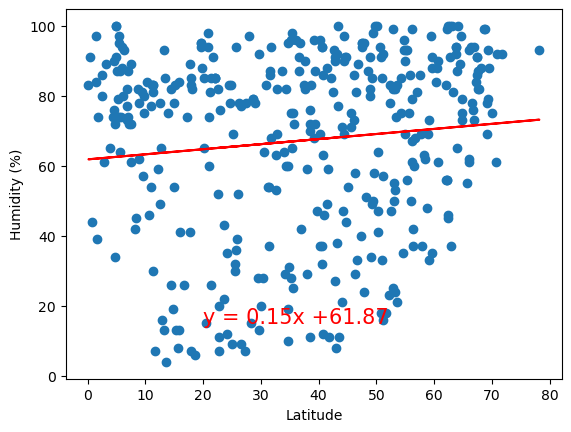

In [30]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Get regression values
regress_values_n = northern_hemi_df['Lat'] * slope + intercept
print(f'The regression values in Northern Hemisphere are :\n {regress_values_n}')

# Linear regression on Northern Hemisphere
line_eq_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_n)

# Create Plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],marker="o")
plt.plot(northern_hemi_df['Lat'],regress_values_n,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq_n,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The regression values in Southern Hemisphere are :
 City_ID
2      77.990464
3      64.606639
8      72.801766
10     69.747077
12     74.786909
         ...    
543    72.598564
544    77.110640
548    69.885418
561    77.057850
562    75.884328
Name: Lat, Length: 184, dtype: float64
y = 0.28x +78.24
The r-value is: 0.038518819747295895


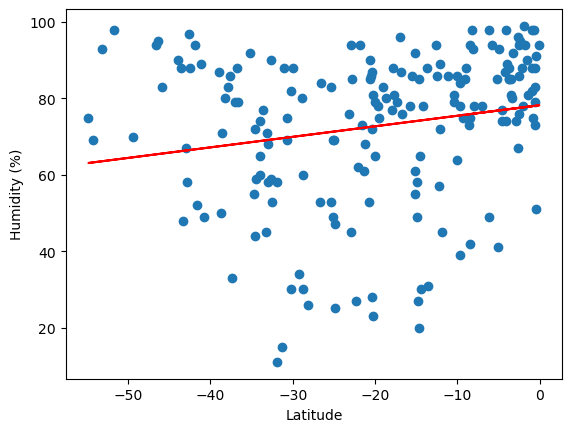

In [31]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Get regression values
regress_values_s = southern_hemi_df['Lat'] * slope + intercept
print(f'The regression values in Southern Hemisphere are :\n {regress_values_s}')

# Linear regression on Northern Hemisphere
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_s)

# Create Plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],marker="o")
plt.plot(southern_hemi_df['Lat'],regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq_n,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a very weak positive correlation between latitude and humidity on both Norththern and Southern Hemisphere. Hence, the Latitude is not the key factor to decide the Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The regression values in Northern Hemisphere are :
 City_ID
0      62.476200
1      62.537668
4      64.702486
5      63.507694
6      64.412816
         ...    
557    64.343299
558    61.899872
559    62.339304
560    64.149147
563    63.666671
Name: Lat, Length: 380, dtype: float64
The r-value is: 0.0009768612193616802


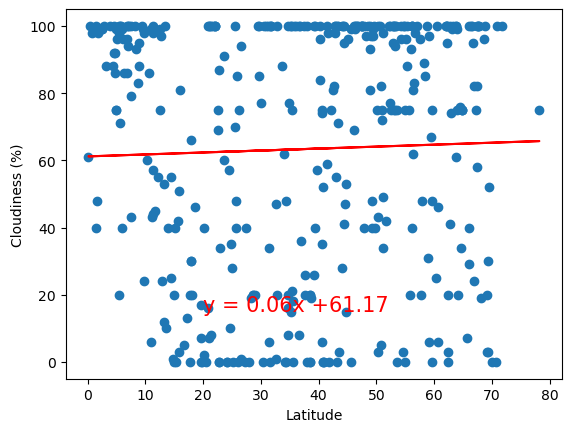

In [32]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Get regression values
regress_values_n = northern_hemi_df['Lat'] * slope + intercept
print(f'The regression values in Northern Hemisphere are :\n {regress_values_n}')

# Linear regression on Northern Hemisphere
line_eq_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Create Plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],marker="o")
plt.plot(northern_hemi_df['Lat'],regress_values_n,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq_n,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The regression values in Southern Hemisphere are :
 City_ID
2      69.448774
3      33.985450
8      55.700203
10     47.606148
12     60.960267
         ...    
543    55.161775
544    67.117490
548    47.972712
561    66.977613
562    63.868113
Name: Lat, Length: 184, dtype: float64
y = 0.73x +70.11
The r-value is: 0.07752261083386815


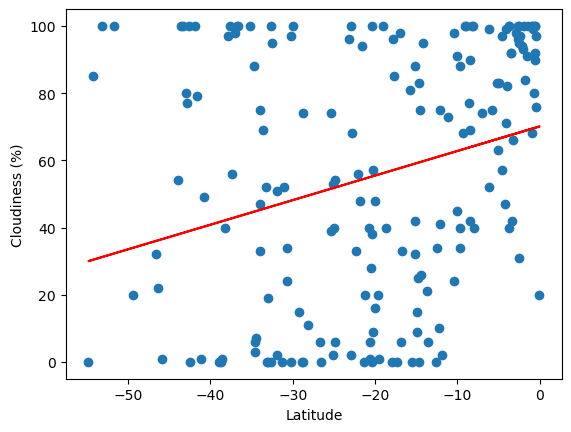

In [33]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Get regression values
regress_values_s = southern_hemi_df['Lat'] * slope + intercept
print(f'The regression values in Southern Hemisphere are :\n {regress_values_s}')

# Linear regression on Northern Hemisphere
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_s)

# Create Plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],marker="o")
plt.plot(southern_hemi_df['Lat'],regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq_n,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is almost no correlating between Cloudiness and a city position on both Northern and Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The regression values in Northern Hemisphere are :
 City_ID
0      3.661517
1      3.671641
4      4.028198
5      3.831410
6      3.980488
         ...   
557    3.969038
558    3.566592
559    3.638969
560    3.937061
563    3.857594
Name: Lat, Length: 380, dtype: float64
The r-value is: 0.005523783763754023


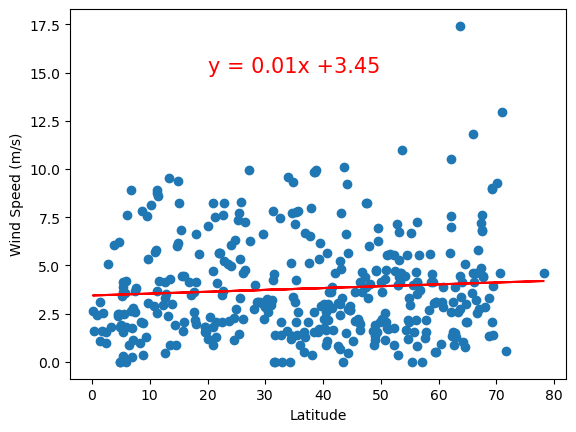

In [26]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Get regression values
regress_values_n = northern_hemi_df['Lat'] * slope + intercept
print(f'The regression values in Northern Hemisphere are :\n {regress_values_n}')

# Linear regression on Northern Hemisphere
line_eq_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Create Plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],marker="o")
plt.plot(northern_hemi_df['Lat'],regress_values_n,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq_n,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The regression values in Southern Hemisphere are :
 City_ID
2      2.807357
3      4.994619
8      3.655324
10     4.154539
12     3.330901
         ...   
543    3.688533
544    2.951143
548    4.131931
561    2.959771
562    3.151554
Name: Lat, Length: 184, dtype: float64
y = -0.05x +2.77
The r-value is: 0.05944342632476879


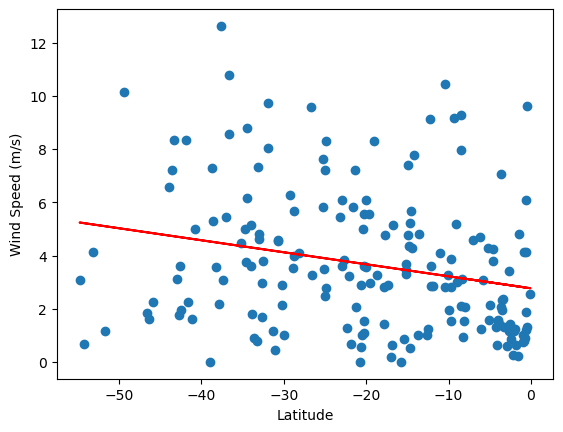

In [27]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Get regression values
regress_values_s = southern_hemi_df['Lat'] * slope + intercept
print(f'The regression values in Southern Hemisphere are :\n {regress_values_s}')

# Linear regression on Northern Hemisphere
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_s)

# Create Plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],marker="o")
plt.plot(southern_hemi_df['Lat'],regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq_s,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is almost no correlating between Wind Speed and a city position on both Northern and Southern Hemisphere. As we noticed from the pictures above, we can see the dramaticly high wind speed happend on higher latitude locations.